<a href="https://colab.research.google.com/github/aleja-k/PandasSecop/blob/master/SECOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Analisis Secop**

*Karen Perdomo

# **Cargue de dataframe**

In [73]:
# Importar Librerias a usar dentro del proceso de analisis y graficacion.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
import re

***Nota: El repositorio en Github debe ser público para que pueda interactuar con pandas de lo contrario no es posible obtener la información.***

In [74]:
url="https://raw.githubusercontent.com/aleja-k/PandasSecop/master/SECOP_entrenamiento.csv" # URL
#df=pd.read_csv(url,index_col="Unnamed: 0")
df= pd.read_csv(url, encoding= "utf-8",sep=';') # Encoding segun el tipo del csv y separador ;
df.head(10)

,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,FASE_ACTUAL,ENTIDAD_ESTATAL,FECHA_PUBLICACION,FECHA_OFERTAS,CODIGO_NOTICE,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,FECHA_TERMINACION,DESCRIPCION_CONTRATO,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,Licita
0,2080,HSAM-330-INGENIERIA VITAL S.A.S,330 DE 2024,Publicado,Contratación régimen especial,OFICINA DE GESTION JURIDICA Y CONTRATACION,297000000,Presentación de oferta,E.S.E. HOSPITAL SAN ANTONIO,5 días de tiempo transcurrido (9/02/2024 6:10:...,NaN,CO1.NTC.5631144,-,Decreto 092 de 2017,Decreto 092 de 2017,"31/12/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,200000000,85161500 - Reparación de equipo médico o quirú...,0
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,Presentación de oferta,SUPERINTENDENCIA DE SOCIEDADES,6 días de tiempo transcurrido (9/02/2024 10:46...,NaN,CO1.NTC.5625612,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",Prestar servicios profesionales especializados...,85800000,80101500 - Servicios de consultoría de negocio...,0
2,2082,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 83 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,Presentación de oferta,SUPERINTENDENCIA DE SOCIEDADES,6 días de tiempo transcurrido (9/02/2024 10:31...,NaN,CO1.NTC.5625188,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,"11/08/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",Prestar servicios profesionales especializados...,46800000,80101500 - Servicios de consultoría de negocio...,0
3,2083,Prestar servicios profesionales en el habilita...,DIRECTA 120-2024,Proceso adjudicado y celebrado,Contratación régimen especial,Grupo de Gestion Juridica y Contractual,51380467,Presentación de oferta,UNIDAD DE PLANEACION MINERO ENERGETICO,6 días de tiempo transcurrido (8/02/2024 4:18:...,NaN,CO1.NTC.5619877,-,Prestación de servicios,Regla aplicable,"30/12/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",Prestar servicios profesionales en el habilita...,60208434,80111620 - Servicios temporales de recursos hu...,1
4,2084,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 85 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,Presentación de oferta,SUPERINTENDENCIA DE SOCIEDADES,7 días de tiempo transcurrido (7/02/2024 3:25:...,NaN,CO1.NTC.5609851,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",Prestar servicios profesionales especializados...,85800000,80101500 - Servicios de consultoría de negocio...,0
5,2085,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 84 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,Presentación de oferta,SUPERINTENDENCIA DE SOCIEDADES,7 días de tiempo transcurrido (7/02/2024 2:47:...,NaN,CO1.NTC.5609079,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,"6/08/2024 11:59:00 PM ((UTC-05:00) Bogotá, Lim...",Prestar servicios profesionales especializados...,46800000,80101500 - Servicios de consultoría de negocio...,0
6,2086,JEHISON DAVID CIFUENTES CORTES,104772,Proceso adjudicado y celebrado,Contratación directa.,DIRECCION DE CONTRATACION,24600000,Presentación de oferta,SECRETARIA DISTRITAL DE GOBIERNO 1,9 días de tiempo transcurrido (5/02/2024 3:45:...,NaN,CO1.NTC.5590960,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,"5/06/2024 11:00:00 PM ((UTC-05:00) Bogotá, Lim...",PRESTAR LOS SERVICIOS PROFESIONALES EN LA SECR...,24600000,80111600 - Servicios de personal temporal,0
7,2087,DIMPE_MERCADO_2024_GEIH_BT_TH_Prestación de se...,EDP-325-2024,Proceso adjudicado y celebrado,Contratación di

# **Balancear cada categoría**

In [75]:
import pandas as pd
from sklearn.utils import resample

import pandas as pd
from sklearn.utils import resample

# Definir los valores de las variables
category_columns = ['TIPO_PROCESO', 'VALOR_ESTIMADO', 'DESCRIPCION_CONTRATO', 'CODIGO_UNSPSC']
balanced_size = 27

def balance_categories(df, category_columns, balanced_size):
    new_distribution = {}
    balanced_data = pd.DataFrame()

    for category_column in category_columns:
        # Verificar la distribución inicial de la categoría
        initial_distribution = df[category_column].value_counts()
        print(f"Distribución inicial de {category_column}:\n{initial_distribution}")

        # Balancear cada categoría en la columna especificada
        for category in initial_distribution.index:
            category_data = df[df[category_column] == category]

            # Resamplear los datos para equilibrar
            if len(category_data) > balanced_size:
                category_sample = resample(category_data, n_samples=balanced_size, random_state=42, replace=False)
            elif len(category_data) < balanced_size:
                category_sample = resample(category_data, n_samples=balanced_size, random_state=42, replace=True)
            else:
                category_sample = category_data

            balanced_data = pd.concat([balanced_data, category_sample], axis=0)

        # Mostrar la nueva distribución balanceada
        new_distribution[category_column] = balanced_data[category_column].value_counts()
        print(f"Distribución después del balanceo de {category_column}:\n{new_distribution[category_column]}")

    # Reemplazar el contenido del DataFrame original con el DataFrame balanceado
    df = balanced_data

    return df, new_distribution

# Ejemplo de uso
# Suponiendo que df es tu DataFrame original
df, new_distributions = balance_categories(df, category_columns, balanced_size)



Distribución inicial de TIPO_PROCESO:
TIPO_PROCESO
Contratación directa.                         78
Contratación régimen especial                 28
Licitación pública (Obra pública)              2
Solicitud de información a los Proveedores     1
Licitación pública                             1
Contratación directa (con ofertas)             1
Name: count, dtype: int64
Distribución después del balanceo de TIPO_PROCESO:
TIPO_PROCESO
Contratación directa.                         27
Contratación régimen especial                 27
Licitación pública (Obra pública)             27
Solicitud de información a los Proveedores    27
Licitación pública                            27
Contratación directa (con ofertas)            27
Name: count, dtype: int64
Distribución inicial de VALOR_ESTIMADO:
VALOR_ESTIMADO
44000000     10
21000000      4
48463093      3
300000        3
36000000      3
             ..
63825000      1
114840000     1
102718000     1
86152000      1
359540993     1
Name: count, L

## **Analisis de primera instancia del Dataframe**

In [76]:
df.columns # Nombre de las columnas del Dataframe

Index(['Id', 'DESCRIPCION', 'NUMERO_PROCESO', 'ESTADO', 'TIPO_PROCESO',
       'UNIDAD_CONTRATACION', 'VALOR_ESTIMADO', 'FASE_ACTUAL',
       'ENTIDAD_ESTATAL', 'FECHA_PUBLICACION', 'FECHA_OFERTAS',
       'CODIGO_NOTICE', 'FECHA_PRESENTACION', 'TIPO_CONTRATO',
       'JUSTIFICACION_CONTRATO', 'FECHA_TERMINACION', 'DESCRIPCION_CONTRATO',
       'VALOR_ESTIMADO_ADQUISICIONES', 'CODIGO_UNSPSC', 'Licita'],
      dtype='object')

In [77]:
df.info() # Informacion de registros y tipo de variable de cada una de las columnas del DF

<class 'pandas.core.frame.DataFrame'>
Index: 5940 entries, 56 to 110
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            5940 non-null   int64  
 1   DESCRIPCION                   5940 non-null   object 
 2   NUMERO_PROCESO                5940 non-null   object 
 3   ESTADO                        5940 non-null   object 
 4   TIPO_PROCESO                  5940 non-null   object 
 5   UNIDAD_CONTRATACION           5940 non-null   object 
 6   VALOR_ESTIMADO                5940 non-null   object 
 7   FASE_ACTUAL                   5940 non-null   object 
 8   ENTIDAD_ESTATAL               5940 non-null   object 
 9   FECHA_PUBLICACION             5940 non-null   object 
 10  FECHA_OFERTAS                 0 non-null      float64
 11  CODIGO_NOTICE                 5940 non-null   object 
 12  FECHA_PRESENTACION            5940 non-null   object 
 13  TIPO_CON

**Cercion de  la edad y las fechas a los tipos int y date**

In [78]:
# Convertir la columna 'CODIGO_UNSPSC' a tipo cadena
df['CODIGO_UNSPSC'] = df['CODIGO_UNSPSC'].astype(str)

# Reemplazar letras y caracteres especiales por nada (eliminarlos)
df['CODIGO_UNSPSC'] = df['CODIGO_UNSPSC'].str.replace('[^0-9]', '', regex=True)

# Convertir la columna 'CODIGO_UNSPSC' a numérica
df["CODIGO_UNSPSC"] = pd.to_numeric(df['CODIGO_UNSPSC'], errors="coerce")

# Mostrar las primeras 3 filas del DataFrame resultante
df



,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,FASE_ACTUAL,ENTIDAD_ESTATAL,FECHA_PUBLICACION,FECHA_OFERTAS,CODIGO_NOTICE,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,FECHA_TERMINACION,DESCRIPCION_CONTRATO,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,Licita
56,13,PRESTACION DE SERVICIOS,4137.010.32.1.090-2024,Proceso adjudicado y celebrado,Contratación directa.,CONTRACION DADII 2024,10462000,Presentación de oferta,SANTIAGO DE CALI DISTRITO ESPECIAL -DEPARTAMEN...,"1/03/2024 2:19:48 PM ((UTC-05:00) Bogotá, Lima...",NaN,CO1.NTC.5764789,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,1 día de tiempo transcurrido (30/04/2024 11:50...,Prestar los servicios Profesionales con el fin...,31386000,80111500,0
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,Presentación de oferta,SUPERINTENDENCIA DE SOCIEDADES,6 días de tiempo transcurrido (9/02/2024 10:46...,NaN,CO1.NTC.5625612,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",Prestar servicios profesionales especializados...,85800000,80101500,0
57,14,servicio paas de herramienta bussines manageme...,ENV-11-09-0030-24,Proceso en evaluación y observaciones,Contratación directa.,SECRETARIA GENERAL - DIRECCION DE TICS,550000000,Presentación de oferta,MUNICIPIO DE ENVIGADO,"28/02/2024 4:35:49 PM ((UTC-05:00) Bogotá, Lim...",NaN,CO1.NTC.5749073,-,Prestación de servicios,No existe pluralidad de oferentes en el mercado,"30/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",servicio paas de herramienta bussines managem...,486000000,81112200,0
18,2098,CARLOS ARTURO GOMEZ JIMENEZ,CD-293-2024,Proceso adjudicado y celebrado,Contratación directa.,CONTRATOS,121000000,Presentación de oferta,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,21 días de tiempo transcurrido (25/01/2024 11:...,NaN,CO1.NTC.5510453,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,"25/12/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",15-0029 Prestar sus servicios profesionales a ...,124300000,80111600,0
13,2093,Servicios PAAS de herramienta Bussiness Proces...,CD 2024-002,Proceso adjudicado y celebrado,Contratación directa.,UC FONVALMED,135141014,Presentación de oferta,FONDO DE VALORIZACION DEL MUNICIPIO DE MEDELLIN,20 días de tiempo transcurrido (26/01/2024 11:...,NaN,CO1.NTC.5519617,-,Prestación de servicios,No existe pluralidad de oferentes en el mercado,"31/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",Servicios PAAS de herramienta Bussiness Proces...,181092812,81111508,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,414,CPS 001 DE 2024-ENLACES IPS.A.S,CPS 001 DE 2024-ENLACES IPS.A.S,Publicado,Contratación régimen especial,CONTRATOS LAS CEIBAS EMPRESAS PUBLICAS DE NEIVA,359540993,Presentación de oferta,LAS CEIBAS EMPRESAS PUBLICAS DE NEIVA E.S.P.,"12/02/2024 1:25:09 PM ((UTC-05:00) Bogotá, Lim...",NaN,CO1.NTC.5638591,-,Prestación de servicios,Regla aplicable,6 días para terminar (14/05/2024 11:59:00 PM(U...,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,1612000000,43231501,1
110,414,CPS 001 DE 2024-ENLACES IPS.A.S,CPS 001 DE 2024-ENLACES IPS.A.S,Publicado,Contratación régimen especial,CONTRATOS LAS CEIBAS EMPRESAS PUBLICAS DE NEIVA,359540993,Presentación de oferta,LAS CEIBAS EMPRESAS PUBLICAS DE NEIVA E.S.P.,"12/02/2024 1:25:09 PM ((UTC-05:00) Bogotá, Lim...",NaN,CO1.NTC.5638591,-,Prestación de servicios,Regla aplicable,6 días para terminar (14/05/2024 11:59:00 PM(U...,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,1612000000,43231501,1
110,414,CPS 001 DE 2024-ENLACES IPS.A.S,CPS 001 DE 2024-ENLACES IPS.A.S,Publicado,Contratación régimen especial,CONTRATOS LAS CEIBAS EMPRESAS PUBLICAS DE NEIVA,359540993,Presentación de oferta,LAS CEIBAS EMPRESAS PUBLICAS DE NEIVA E.S.P.,"12/02/2024 1:25:09 PM ((UTC-05:0

***Nota: En el caso de que existan diferentes tipos de datos al numérico se utliza el errors="coerce" y los deja como NaN***


In [79]:
#df1=df Transofrmacion a formato fecha de la fecha incidente
df['FECHA_PRESENTACION']=pd.to_datetime(df['FECHA_PRESENTACION'], errors="coerce")
df.head(3)

<ipython-input-79-37c78a5d8500>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FECHA_PRESENTACION']=pd.to_datetime(df['FECHA_PRESENTACION'], errors="coerce")


,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,FASE_ACTUAL,ENTIDAD_ESTATAL,FECHA_PUBLICACION,FECHA_OFERTAS,CODIGO_NOTICE,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,FECHA_TERMINACION,DESCRIPCION_CONTRATO,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,Licita
56,13,PRESTACION DE SERVICIOS,4137.010.32.1.090-2024,Proceso adjudicado y celebrado,Contratación directa.,CONTRACION DADII 2024,10462000,Presentación de oferta,SANTIAGO DE CALI DISTRITO ESPECIAL -DEPARTAMEN...,"1/03/2024 2:19:48 PM ((UTC-05:00) Bogotá, Lima...",NaN,CO1.NTC.5764789,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,1 día de tiempo transcurrido (30/04/2024 11:50...,Prestar los servicios Profesionales con el fin...,31386000,80111500,0
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,Presentación de oferta,SUPERINTENDENCIA DE SOCIEDADES,6 días de tiempo transcurrido (9/02/2024 10:46...,NaN,CO1.NTC.5625612,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",Prestar servicios profesionales especializados...,85800000,80101500,0
57,14,servicio paas de herramienta bussines manageme...,ENV-11-09-0030-24,Proceso en evaluación y observaciones,Contratación directa.,SECRETARIA GENERAL - DIRECCION DE TICS,550000000,Presentación de oferta,MUNICIPIO DE ENVIGADO,"28/02/2024 4:35:49 PM ((UTC-05:00) Bogotá, Lim...",NaN,CO1.NTC.5749073,NaT,Prestación de servicios,No existe pluralidad de oferentes en el mercado,"30/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",servicio paas de herramienta bussines managem...,486000000,81112200,0


In [80]:
df['FECHA_TERMINACION']=pd.to_datetime(df['FECHA_TERMINACION'], errors="coerce")
df.head(3)

<ipython-input-80-f5ac581b5303>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FECHA_TERMINACION']=pd.to_datetime(df['FECHA_TERMINACION'], errors="coerce")


,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,FASE_ACTUAL,ENTIDAD_ESTATAL,FECHA_PUBLICACION,FECHA_OFERTAS,CODIGO_NOTICE,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,FECHA_TERMINACION,DESCRIPCION_CONTRATO,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,Licita
56,13,PRESTACION DE SERVICIOS,4137.010.32.1.090-2024,Proceso adjudicado y celebrado,Contratación directa.,CONTRACION DADII 2024,10462000,Presentación de oferta,SANTIAGO DE CALI DISTRITO ESPECIAL -DEPARTAMEN...,"1/03/2024 2:19:48 PM ((UTC-05:00) Bogotá, Lima...",NaN,CO1.NTC.5764789,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,NaT,Prestar los servicios Profesionales con el fin...,31386000,80111500,0
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,Presentación de oferta,SUPERINTENDENCIA DE SOCIEDADES,6 días de tiempo transcurrido (9/02/2024 10:46...,NaN,CO1.NTC.5625612,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,NaT,Prestar servicios profesionales especializados...,85800000,80101500,0
57,14,servicio paas de herramienta bussines manageme...,ENV-11-09-0030-24,Proceso en evaluación y observaciones,Contratación directa.,SECRETARIA GENERAL - DIRECCION DE TICS,550000000,Presentación de oferta,MUNICIPIO DE ENVIGADO,"28/02/2024 4:35:49 PM ((UTC-05:00) Bogotá, Lim...",NaN,CO1.NTC.5749073,NaT,Prestación de servicios,No existe pluralidad de oferentes en el mercado,NaT,servicio paas de herramienta bussines managem...,486000000,81112200,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5940 entries, 56 to 110
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Id                            5940 non-null   int64         
 1   DESCRIPCION                   5940 non-null   object        
 2   NUMERO_PROCESO                5940 non-null   object        
 3   ESTADO                        5940 non-null   object        
 4   TIPO_PROCESO                  5940 non-null   object        
 5   UNIDAD_CONTRATACION           5940 non-null   object        
 6   VALOR_ESTIMADO                5940 non-null   object        
 7   FASE_ACTUAL                   5940 non-null   object        
 8   ENTIDAD_ESTATAL               5940 non-null   object        
 9   FECHA_PUBLICACION             5940 non-null   object        
 10  FECHA_OFERTAS                 0 non-null      float64       
 11  CODIGO_NOTICE                 5940 

## **Dimensiones del Dataframe y limpieza**

In [82]:
df.isnull().sum() # Hallar la cantidad de nulos por columna del DF

Id                                 0
DESCRIPCION                        0
NUMERO_PROCESO                     0
ESTADO                             0
TIPO_PROCESO                       0
UNIDAD_CONTRATACION                0
VALOR_ESTIMADO                     0
FASE_ACTUAL                        0
ENTIDAD_ESTATAL                    0
FECHA_PUBLICACION                  0
FECHA_OFERTAS                   5940
CODIGO_NOTICE                      0
FECHA_PRESENTACION              5940
TIPO_CONTRATO                     84
JUSTIFICACION_CONTRATO            84
FECHA_TERMINACION               5940
DESCRIPCION_CONTRATO               0
VALOR_ESTIMADO_ADQUISICIONES       0
CODIGO_UNSPSC                      0
Licita                             0
dtype: int64

In [83]:
row=df.shape[0] # Tamaño de las filas
column=df.shape[1] # Tamaño de las columnas
size= row*column
print(size)

118800


In [84]:
nulos=df.isnull().sum().sum() # Suma los valores nulos

In [85]:
NaN_Porcentage= (nulos/size)*100 #porcentaje de numeros nulos
NaN_Porcentage

15.141414141414142

***Nota: Por efectos de aleración en la base de datos no vamos a realizar la eliminacion de los NaN por la importancia de las variables a nivel de estudio.***

## **Generacion de nuevas columnas**

In [86]:
"""licita=df.loc[1,"FECHA_PUBLICACION"]
SECOP = df.loc[1,'FECHA_PRESENTACION']
res= round(abs((SECOP-licita).total_seconds() /60),2)
res"""


'licita=df.loc[1,"FECHA_PUBLICACION"]\nSECOP = df.loc[1,\'FECHA_PRESENTACION\']\nres= round(abs((SECOP-licita).total_seconds() /60),2)\nres'

In [87]:
 # Se extrae la fecha de publicación

df['FECHA_PUBLICACION'] = df['FECHA_PUBLICACION'].astype(str).apply(lambda x: re.search(r'\d+/\d+/\d+', x).group() if re.search(r'\d+/\d+/\d+', x) else None)
print(df['FECHA_PUBLICACION'])



56      1/03/2024
1       9/02/2024
57     28/02/2024
18     25/01/2024
13     26/01/2024
          ...    
110    12/02/2024
110    12/02/2024
110    12/02/2024
110    12/02/2024
110    12/02/2024
Name: FECHA_PUBLICACION, Length: 5940, dtype: object


In [88]:
df['FECHA_PRESENTACION'] = df['FECHA_PRESENTACION'].astype(str).apply(lambda x: re.search(r'\d+/\d+/\d+', x).group() if re.search(r'\d+/\d+/\d+', x) else None)
print(df['FECHA_PRESENTACION'])


56     None
1      None
57     None
18     None
13     None
       ... 
110    None
110    None
110    None
110    None
110    None
Name: FECHA_PRESENTACION, Length: 5940, dtype: object


In [89]:

for index, row in df.iterrows():
    licita = row["FECHA_PUBLICACION"]
    SECOP = row['FECHA_PRESENTACION']

    if licita is not None and SECOP is not None:
        licita = pd.to_datetime(licita)  # Convertir a datetime si no lo está
        SECOP = pd.to_datetime(SECOP)    # Convertir a datetime si no lo está
        res = round(abs((licita - SECOP).total_seconds() / 60), 2)
        df.loc[index, "MINUTOS_INICIO_OFERTA"] = res
    else:
        df.loc[index, "MINUTOS_INICIO_OFERTA"] = None

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5940 entries, 56 to 110
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Id                            5940 non-null   int64         
 1   DESCRIPCION                   5940 non-null   object        
 2   NUMERO_PROCESO                5940 non-null   object        
 3   ESTADO                        5940 non-null   object        
 4   TIPO_PROCESO                  5940 non-null   object        
 5   UNIDAD_CONTRATACION           5940 non-null   object        
 6   VALOR_ESTIMADO                5940 non-null   object        
 7   FASE_ACTUAL                   5940 non-null   object        
 8   ENTIDAD_ESTATAL               5940 non-null   object        
 9   FECHA_PUBLICACION             5940 non-null   object        
 10  FECHA_OFERTAS                 0 non-null      float64       
 11  CODIGO_NOTICE                 5940 

In [91]:
df.describe()

,Id,FECHA_OFERTAS,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,Licita,MINUTOS_INICIO_OFERTA
count,5940.000000,0.0,0,5.940000e+03,5.940000e+03,5940.000000,0.0
mean,957.413468,NaN,NaT,1.679120e+09,7.796182e+07,0.124411,NaN
min,1.000000,NaN,NaT,0.000000e+00,4.322260e+07,0.000000,NaN
25%,28.750000,NaN,NaT,0.000000e+00,8.010151e+07,0.000000,NaN
50%,61.000000,NaN,NaT,5.726500e+07,8.011160e+07,0.000000,NaN
75%,2101.000000,NaN,NaT,2.286672e+08,8.111150e+07,0.000000,NaN
max,2213.000000,NaN,NaT,9.000000e+10,9.315150e+07,1.000000,NaN
std,1029.082873,NaN,NaN,8.940576e+09,1.005627e+07,0.330077,NaN


## **Agrupamiento mulltiple y filtros**

In [92]:
df.columns

Index(['Id', 'DESCRIPCION', 'NUMERO_PROCESO', 'ESTADO', 'TIPO_PROCESO',
       'UNIDAD_CONTRATACION', 'VALOR_ESTIMADO', 'FASE_ACTUAL',
       'ENTIDAD_ESTATAL', 'FECHA_PUBLICACION', 'FECHA_OFERTAS',
       'CODIGO_NOTICE', 'FECHA_PRESENTACION', 'TIPO_CONTRATO',
       'JUSTIFICACION_CONTRATO', 'FECHA_TERMINACION', 'DESCRIPCION_CONTRATO',
       'VALOR_ESTIMADO_ADQUISICIONES', 'CODIGO_UNSPSC', 'Licita',
       'MINUTOS_INICIO_OFERTA'],
      dtype='object')

In [93]:
#df.groupby(['TIPO_PROCESO'])[['MINUTOS_INICIO_OFERTA']].value_counts()
df['TIPO_PROCESO']=df['TIPO_PROCESO'].str.upper()
df['TIPO_PROCESO'].value_counts()

TIPO_PROCESO
CONTRATACIÓN DIRECTA.                         3720
CONTRATACIÓN RÉGIMEN ESPECIAL                 1867
LICITACIÓN PÚBLICA (OBRA PÚBLICA)               99
LICITACIÓN PÚBLICA                              85
CONTRATACIÓN DIRECTA (CON OFERTAS)              85
SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES      84
Name: count, dtype: int64

In [94]:
df['ESTADO']=df['ESTADO'].str.upper()# Dejar los datos en mayusculas
df['ESTADO'].value_counts() # Ver la clasificacion por cada diferencia de informacion en la columna y contarlos

ESTADO
PROCESO ADJUDICADO Y CELEBRADO           4019
PUBLICADO                                1613
PROCESO EN EVALUACIÓN Y OBSERVACIONES     308
Name: count, dtype: int64

In [95]:
df['UNIDAD_CONTRATACION']=df['UNIDAD_CONTRATACION'].str.upper()
df['UNIDAD_CONTRATACION'].value_counts()

UNIDAD_CONTRATACION
GRUPO CONTRATOS CORPAMAG                                             555
SECRETARIA GENERAL - DANE CENTRAL                                    552
SECRETARIA GENERAL                                                   540
JURIDICA                                                             277
SECRETARIA DEL INTERIOR                                              253
BPP                                                                  235
MEDELLIN NIVEL CENTRAL                                               164
DIRECCION DE CONTRATACION                                            153
GRUPO DE CONTRATOS UGPP                                              140
SECRETARÍA DE EDUCACIÓN                                              139
GESTIÓN CONTRACTUAL 2024                                             137
UNIDAD DE CONTRATACION                                               128
SUBDIRECCION DE GESTION CONTRACTUAL                                  112
GESTIÓN DE LA CONTRATACIÓN     

In [96]:
df['DESCRIPCION_CONTRATO']=df['DESCRIPCION_CONTRATO'].str.upper()
df['DESCRIPCION_CONTRATO']=df['DESCRIPCION_CONTRATO'].str.replace('^ ','',regex=False)# Eliminar espacios al inicio de cada uno de los datos
df['DESCRIPCION_CONTRATO'].value_counts()

DESCRIPCION_CONTRATO
SUMINISTRO DE ACTIVIDADES DE MANTENIMIENTO PREVENTIVO, CORRECTIVO, ADECUACIONES Y MEJORAMIENTO DE INSTALACIONES FÍSICAS Y MOBILIARIO, DE LAS UNIDADES DE INFORMACIÓN DEL SBPM, LA BIBLIOTECA PÚBLICA PILOTO Y SUS FILIALES                                                                                                                    99
PRESTACIÓN DE SERVICIOS PROFESIONALES A LA SUBDIRECCIÓN DE EDUCACIÓN AMBIENTAL Y PARTICIPACIÓN CIUDADANA DE CORPAMAG.                                                                                                                                                                                                                         90
PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS PARA EL FORTALECIMIENTO DEL MODELO DE OPERACIÓN INTERNO DE LA DIRECCIÓN DE TECNOLOGÍA DE LA INFORMACIÓN Y LAS COMUNICACIONES EN EL CICLO DE MEJORA CONTINUA Y MANTENIMIENTO EVOLUTIVO SOBRE LOS PROCESOS AUTOMATIZADOS EN LA HERRAMIENTA BPM AURA PORTAL.         

In [97]:
df['TIPO_PROCESO'] = df['TIPO_PROCESO'].str.upper()
df['TIPO_PROCESO'] = df['TIPO_PROCESO'].str.replace('^ ', '', regex=False)  # Eliminar espacios al inicio de cada uno de los datos
df['TIPO_PROCESO'].value_counts()


TIPO_PROCESO
CONTRATACIÓN DIRECTA.                         3720
CONTRATACIÓN RÉGIMEN ESPECIAL                 1867
LICITACIÓN PÚBLICA (OBRA PÚBLICA)               99
LICITACIÓN PÚBLICA                              85
CONTRATACIÓN DIRECTA (CON OFERTAS)              85
SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES      84
Name: count, dtype: int64

In [98]:

df['TIPO_CONTRATO'].value_counts()

TIPO_CONTRATO
Prestación de servicios    4879
Decreto 092 de 2017         547
Otro                        249
Obra                         99
Compraventa                  82
Name: count, dtype: int64

In [99]:
#df['CODIGO_UNSPSC'] = df['CODIGO_UNSPSC'].str.replace('[a-zA-ZáéíóúÁÉÍÓÚñÑ\s-]', '', regex=True)

 #Remplazo de valores

In [100]:
df['CODIGO_UNSPSC'].value_counts()

CODIGO_UNSPSC
80111600    1626
80101500     643
80111500     635
81111500     514
81112200     326
72101500     163
81111504     137
80111701     111
72101507      82
43231500      82
43231501      82
93141500      82
80161500      82
86101601      82
80111620      82
84111600      82
72103300      82
72154100      82
81141902      82
85161500      82
43222600      82
80111608      82
81141500      82
81111508      82
80101509      81
43232202      81
43231600      81
81112213      81
93141702      81
93151500      68
Name: count, dtype: int64

In [101]:
df['FECHA_OFERTAS'].value_counts()

Series([], Name: count, dtype: int64)

In [102]:
df['FECHA_OFERTAS'] = df['FECHA_OFERTAS'].replace('0', 'SIN_DATO', limit=0)


 #Remplazo de valores

In [103]:
df['FECHA_OFERTAS'].value_counts()

Series([], Name: count, dtype: int64)

In [104]:
df['VALOR_ESTIMADO'].str.replace(',', '.')


56      10462000
1       85800000
57     550000000
18     121000000
13     135141014
         ...    
110    359540993
110    359540993
110    359540993
110    359540993
110    359540993
Name: VALOR_ESTIMADO, Length: 5940, dtype: object

Generación de filtros con respecto al si licita o no la entidad en SECOP esta se utiliza para generar las gráficas que se encuentran dentro del estudio de este dataframe en la seccion de graficacion


In [105]:
#Casos_licita = df.loc['FECHA_OFERTAS']

In [106]:
#Casos_licita=Casos_licita.reset_index(drop = True) # Reordenamos el DF
#Casos_licita.head()

## **Creacion de un nuevo dataframe**

In [107]:
SECOP = df[['TIPO_PROCESO','VALOR_ESTIMADO','DESCRIPCION_CONTRATO','CODIGO_UNSPSC']] # Creo nuevo df basado en las anteriores columnas
#SECOP = SECOP[SECOP['TIPO_PROCESO'].str.contains('CONTRATACIÓN RÉGIMEN ESPECIAL|LICITACIÓN PÚBLICA \(OBRA PÚBLICA\)', case=False, na=False)]
SECOP=SECOP.reset_index(drop = True)
SECOP.to_excel('SECOP.xlsx', index=False)
SECOP



,TIPO_PROCESO,VALOR_ESTIMADO,DESCRIPCION_CONTRATO,CODIGO_UNSPSC
0,CONTRATACIÓN DIRECTA.,10462000,PRESTAR LOS SERVICIOS PROFESIONALES CON EL FIN...,80111500
1,CONTRATACIÓN DIRECTA.,85800000,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500
2,CONTRATACIÓN DIRECTA.,550000000,SERVICIO PAAS DE HERRAMIENTA BUSSINES MANAGEM...,81112200
3,CONTRATACIÓN DIRECTA.,121000000,15-0029 PRESTAR SUS SERVICIOS PROFESIONALES A ...,80111600
4,CONTRATACIÓN DIRECTA.,135141014,SERVICIOS PAAS DE HERRAMIENTA BUSSINESS PROCES...,81111508
...,...,...,...,...
5935,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501
5936,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501
5937,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501
5938,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501


### **Filtro 2**

In [108]:
Respuesta_Licita=df.groupby(["TIPO_PROCESO"])[["MINUTOS_INICIO_OFERTA"]].mean() # Agrupa la columna que desea
Respuesta_Licita

,MINUTOS_INICIO_OFERTA
TIPO_PROCESO,
CONTRATACIÓN DIRECTA (CON OFERTAS),NaN
CONTRATACIÓN DIRECTA.,NaN
CONTRATACIÓN RÉGIMEN ESPECIAL,NaN
LICITACIÓN PÚBLICA,NaN
LICITACIÓN PÚBLICA (OBRA PÚBLICA),NaN
SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES,NaN


In [109]:
Respuesta_Licita=Respuesta_Licita.rename_axis("TIPO_PROCESO").reset_index() # Modifica el dataframe generando la columna de director y generando un index
Respuesta_Licita

,TIPO_PROCESO,MINUTOS_INICIO_OFERTA
0,CONTRATACIÓN DIRECTA (CON OFERTAS),NaN
1,CONTRATACIÓN DIRECTA.,NaN
2,CONTRATACIÓN RÉGIMEN ESPECIAL,NaN
3,LICITACIÓN PÚBLICA,NaN
4,LICITACIÓN PÚBLICA (OBRA PÚBLICA),NaN
5,SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES,NaN


In [110]:
union = pd.merge(SECOP, Respuesta_Licita) # Union de Dataframes A traves del Merge
union


,TIPO_PROCESO,VALOR_ESTIMADO,DESCRIPCION_CONTRATO,CODIGO_UNSPSC,MINUTOS_INICIO_OFERTA
0,CONTRATACIÓN DIRECTA.,10462000,PRESTAR LOS SERVICIOS PROFESIONALES CON EL FIN...,80111500,NaN
1,CONTRATACIÓN DIRECTA.,85800000,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500,NaN
2,CONTRATACIÓN DIRECTA.,550000000,SERVICIO PAAS DE HERRAMIENTA BUSSINES MANAGEM...,81112200,NaN
3,CONTRATACIÓN DIRECTA.,121000000,15-0029 PRESTAR SUS SERVICIOS PROFESIONALES A ...,80111600,NaN
4,CONTRATACIÓN DIRECTA.,135141014,SERVICIOS PAAS DE HERRAMIENTA BUSSINESS PROCES...,81111508,NaN
...,...,...,...,...,...
5935,CONTRATACIÓN DIRECTA (CON OFERTAS),189772056,"PRESTAR EL SERVICIO DE SOPORTE TÉCNICO, ACTUAL...",81111500,NaN
5936,CONTRATACIÓN DIRECTA (CON OFERTAS),189772056,"PRESTAR EL SERVICIO DE SOPORTE TÉCNICO, ACTUAL...",81111500,NaN
5937,CONTRATACIÓN DIRECTA (CON OFERTAS),189772056,"PRESTAR EL SERVICIO DE SOPORTE TÉCNICO, ACTUAL...",81111500,NaN
5938,CONTRATACIÓN DIRECTA (CON OFERTAS),189772056,"PRESTAR EL SERVICIO DE SOPORTE TÉCNICO, ACTUAL...",81111500,NaN


***Análisis de otro tipo de variables con respecto a la licitación***

In [111]:

licita1 = df[['TIPO_PROCESO','VALOR_ESTIMADO','TIPO_CONTRATO','DESCRIPCION_CONTRATO','CODIGO_UNSPSC']] # Creo nuevo df basado en las anteriores columnas
#licita1 = SECOP[SECOP['TIPO_PROCESO'].str.contains('CONTRATACIÓN RÉGIMEN ESPECIAL|LICITACIÓN PÚBLICA \(OBRA PÚBLICA\)', case=False, na=False)]
licita1=licita1.reset_index(drop = True)
licita1

,TIPO_PROCESO,VALOR_ESTIMADO,TIPO_CONTRATO,DESCRIPCION_CONTRATO,CODIGO_UNSPSC
0,CONTRATACIÓN DIRECTA.,10462000,Prestación de servicios,PRESTAR LOS SERVICIOS PROFESIONALES CON EL FIN...,80111500
1,CONTRATACIÓN DIRECTA.,85800000,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500
2,CONTRATACIÓN DIRECTA.,550000000,Prestación de servicios,SERVICIO PAAS DE HERRAMIENTA BUSSINES MANAGEM...,81112200
3,CONTRATACIÓN DIRECTA.,121000000,Prestación de servicios,15-0029 PRESTAR SUS SERVICIOS PROFESIONALES A ...,80111600
4,CONTRATACIÓN DIRECTA.,135141014,Prestación de servicios,SERVICIOS PAAS DE HERRAMIENTA BUSSINESS PROCES...,81111508
...,...,...,...,...,...
5935,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,Prestación de servicios,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501
5936,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,Prestación de servicios,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501
5937,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,Prestación de servicios,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501
5938,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,Prestación de servicios,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501


In [112]:
codigo=df.groupby(["JUSTIFICACION_CONTRATO"])[["VALOR_ESTIMADO_ADQUISICIONES"]].mean() # Agrupa la columna que desea
codigo

,VALOR_ESTIMADO_ADQUISICIONES
JUSTIFICACION_CONTRATO,
"Artículo 30, Ley 80 de 1993",0.000000e+00
Decreto 092 de 2017,3.404180e+09
Ley 1150 de 2007,1.270529e+09
No existe pluralidad de oferentes en el mercado,2.402663e+08
Regla aplicable,1.045741e+09
Servicios profesionales y apoyo a la gestión,1.958899e+09


In [113]:
# Creamos el indice
codigo=codigo.rename_axis("JUSTIFICACION_CONTRATO").reset_index() # Modifica el dataframe generando la columna de director y generando un index
codigo

,JUSTIFICACION_CONTRATO,VALOR_ESTIMADO_ADQUISICIONES
0,"Artículo 30, Ley 80 de 1993",0.000000e+00
1,Decreto 092 de 2017,3.404180e+09
2,Ley 1150 de 2007,1.270529e+09
3,No existe pluralidad de oferentes en el mercado,2.402663e+08
4,Regla aplicable,1.045741e+09
5,Servicios profesionales y apoyo a la gestión,1.958899e+09


**NUEVO DATAFRAME CON CÓDIGOS UNSPSC**

In [114]:
url="https://raw.githubusercontent.com/aleja-k/PandasSecop/master/CODIGOS_UNSPSC_exported_1.csv" # URL
#df=pd.read_csv(url,index_col="Unnamed: 0")
dfc= pd.read_csv(url, encoding= "utf-8",sep=';') # Encoding segun el tipo del csv y separador ;
dfc.head(10)

,CODIGO,DESCRIPCION
0,43230000,SOFTWARE
1,43230002,NaN
2,43231500,NaN
3,25173900,NaN
4,30162300,NaN
5,30191500,NaN
6,30191600,NaN
7,30191800,NaN
8,32101600,NaN
9,32151600,NaN


**USO DE KMeans GaussianMixture DBSCAN**

In [115]:
!pip install pandas scikit-learn scikit-learn-extra


In [116]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


***Se agrega columna 'licita' para clasificación***

In [117]:
SECOP['licita'] = 'SIN_DATO'
SECOP

,TIPO_PROCESO,VALOR_ESTIMADO,DESCRIPCION_CONTRATO,CODIGO_UNSPSC,licita
0,CONTRATACIÓN DIRECTA.,10462000,PRESTAR LOS SERVICIOS PROFESIONALES CON EL FIN...,80111500,SIN_DATO
1,CONTRATACIÓN DIRECTA.,85800000,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500,SIN_DATO
2,CONTRATACIÓN DIRECTA.,550000000,SERVICIO PAAS DE HERRAMIENTA BUSSINES MANAGEM...,81112200,SIN_DATO
3,CONTRATACIÓN DIRECTA.,121000000,15-0029 PRESTAR SUS SERVICIOS PROFESIONALES A ...,80111600,SIN_DATO
4,CONTRATACIÓN DIRECTA.,135141014,SERVICIOS PAAS DE HERRAMIENTA BUSSINESS PROCES...,81111508,SIN_DATO
...,...,...,...,...,...
5935,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501,SIN_DATO
5936,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501,SIN_DATO
5937,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501,SIN_DATO
5938,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501,SIN_DATO


In [118]:
print(df.index)


Index([ 56,   1,  57,  18,  13, 109,  53,   6,  72,  94,
       ...
       110, 110, 110, 110, 110, 110, 110, 110, 110, 110],
      dtype='int64', length=5940)


# **Silhouette** **Clustering**

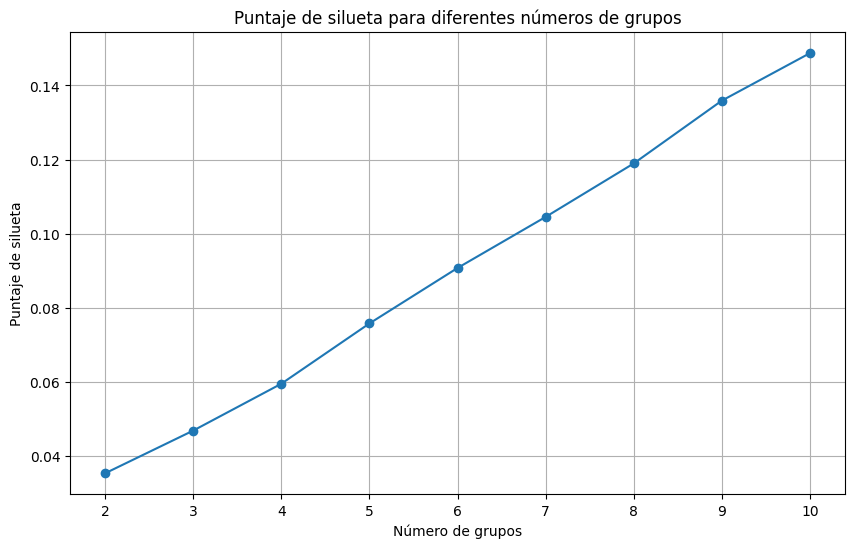

In [119]:
# Combinar los campos de texto en un solo campo
SECOP_clean = SECOP.copy()

SECOP_clean ['texto_combinado'] = SECOP['VALOR_ESTIMADO'].astype(str) + ' '  + SECOP['TIPO_PROCESO'] + ' ' + SECOP['DESCRIPCION_CONTRATO']+ ' ' + SECOP['licita']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto
vectorizador = TfidfVectorizer(stop_words='english')
X = vectorizador.fit_transform(textos)

# Lista para almacenar los puntajes de silueta
silhouette_scores = []

# Calcula el puntaje de silueta para diferentes números de grupos
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Grafica los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de grupos')
plt.ylabel('Puntaje de silueta')
plt.title('Puntaje de silueta para diferentes números de grupos')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()

***Pruebas con clustering : K-Means ,GMM ,DBSCAN  y K-Medoids***

In [120]:
SECOP = pd.DataFrame(SECOP)

# Convertir la columna 'VALOR_ESTIMADO' a tipo cadena
SECOP_clean['VALOR_ESTIMADO'] = SECOP_clean['VALOR_ESTIMADO'].astype(str)

# Reemplazar las comas por puntos en la columna 'VALOR_ESTIMADO'
SECOP_clean['VALOR_ESTIMADO'] = SECOP_clean['VALOR_ESTIMADO'].str.replace(',', '.')

# Convertir la columna 'VALOR_ESTIMADO' a valores numéricos
SECOP_clean['VALOR_ESTIMADO'] = SECOP_clean['VALOR_ESTIMADO'].astype(float)

# Eliminar las columnas 'NUMERO_PROCESO' y 'DESCRIPCION_CONTRATO'
SECOP_clean = SECOP_clean.drop([ 'DESCRIPCION_CONTRATO'], axis=1)
# Convertir las columnas restantes a numérico y escalar los datos
from sklearn.preprocessing import StandardScaler

X = SECOP_clean[['VALOR_ESTIMADO']]
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Mostrar los resultados
print(X_scaled)




[[-0.50862221]
 [-0.11886742]
 [ 2.28263212]
 ...
 [ 1.29730851]
 [ 1.29730851]
 [ 1.29730851]]


In [121]:
# Aplicar K-Medoids
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(X_scaled)
print(X_scaled)

[[-0.50862221]
 [-0.11886742]
 [ 2.28263212]
 ...
 [ 1.29730851]
 [ 1.29730851]
 [ 1.29730851]]


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


In [122]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
print(X_scaled)

[[-0.50862221]
 [-0.11886742]
 [ 2.28263212]
 ...
 [ 1.29730851]
 [ 1.29730851]
 [ 1.29730851]]


In [123]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_scaled)
print(X_scaled)

[[-0.50862221]
 [-0.11886742]
 [ 2.28263212]
 ...
 [ 1.29730851]
 [ 1.29730851]
 [ 1.29730851]]


In [124]:
# Aplicar Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X_scaled)
print(X_scaled)

[[-0.50862221]
 [-0.11886742]
 [ 2.28263212]
 ...
 [ 1.29730851]
 [ 1.29730851]
 [ 1.29730851]]


In [125]:

# Mostrar resultados para variable Valor_estimado
print("K-Means labels:", kmeans_labels)
print("GMM labels:", gmm_labels)
print("DBSCAN labels:", dbscan_labels)
print("K-Medoids labels:", kmedoids_labels)

K-Means labels: [0 0 1 ... 0 0 0]
GMM labels: [0 0 1 ... 1 1 1]
DBSCAN labels: [0 0 1 ... 0 0 0]
K-Medoids labels: [0 0 0 ... 0 0 0]


In [126]:
# Combinar los campos de texto en un solo campo
SECOP_clean['texto_combinado'] = SECOP['TIPO_PROCESO'] + ' ' + SECOP['DESCRIPCION_CONTRATO']+ ' '  + SECOP['licita']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto con palabras clave
vectorizador = TfidfVectorizer(stop_words='english', vocabulary=['servicios', 'licitación', 'pública', 'contratación', 'especial', 'prestación'])
X = vectorizador.fit_transform(textos)

# Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_labels2 = kmeans.fit_predict(X_scaled)
print(X_scaled)




[[-0.50862221]
 [-0.11886742]
 [ 2.28263212]
 ...
 [ 1.29730851]
 [ 1.29730851]
 [ 1.29730851]]


In [127]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan_labels2 = dbscan.fit_predict(X)
print(X)

  (0, 3)	0.6450101615074566
  (0, 0)	0.764173992983355
  (1, 3)	0.6450101615074566
  (1, 0)	0.764173992983355
  (2, 3)	1.0
  (3, 3)	0.6450101615074566
  (3, 0)	0.764173992983355
  (4, 3)	0.6450101615074566
  (4, 0)	0.764173992983355
  (5, 3)	0.6450101615074566
  (5, 0)	0.764173992983355
  (6, 3)	1.0
  (7, 3)	0.6450101615074566
  (7, 0)	0.764173992983355
  (8, 3)	0.6450101615074566
  (8, 0)	0.764173992983355
  (9, 5)	0.8050754754270515
  (9, 3)	0.3826022161438383
  (9, 0)	0.4532869103203075
  (10, 5)	0.4987190064925536
  (10, 3)	0.23701007289520123
  (10, 2)	0.7850214068666986
  (10, 0)	0.2807970239698435
  (11, 3)	0.6450101615074566
  (11, 0)	0.764173992983355
  :	:
  (5931, 3)	0.3243527629375688
  (5932, 5)	0.6825063834179946
  (5932, 4)	0.6549658935917614
  (5932, 3)	0.3243527629375688
  (5933, 5)	0.6825063834179946
  (5933, 4)	0.6549658935917614
  (5933, 3)	0.3243527629375688
  (5934, 5)	0.6825063834179946
  (5934, 4)	0.6549658935917614
  (5934, 3)	0.3243527629375688
  (5935, 5)	0.6

In [128]:
# Aplicar K-Medoids
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels2 = kmedoids.fit_predict(X)
print(X)

  (0, 3)	0.6450101615074566
  (0, 0)	0.764173992983355
  (1, 3)	0.6450101615074566
  (1, 0)	0.764173992983355
  (2, 3)	1.0
  (3, 3)	0.6450101615074566
  (3, 0)	0.764173992983355
  (4, 3)	0.6450101615074566
  (4, 0)	0.764173992983355
  (5, 3)	0.6450101615074566
  (5, 0)	0.764173992983355
  (6, 3)	1.0
  (7, 3)	0.6450101615074566
  (7, 0)	0.764173992983355
  (8, 3)	0.6450101615074566
  (8, 0)	0.764173992983355
  (9, 5)	0.8050754754270515
  (9, 3)	0.3826022161438383
  (9, 0)	0.4532869103203075
  (10, 5)	0.4987190064925536
  (10, 3)	0.23701007289520123
  (10, 2)	0.7850214068666986
  (10, 0)	0.2807970239698435
  (11, 3)	0.6450101615074566
  (11, 0)	0.764173992983355
  :	:
  (5931, 3)	0.3243527629375688
  (5932, 5)	0.6825063834179946
  (5932, 4)	0.6549658935917614
  (5932, 3)	0.3243527629375688
  (5933, 5)	0.6825063834179946
  (5933, 4)	0.6549658935917614
  (5933, 3)	0.3243527629375688
  (5934, 5)	0.6825063834179946
  (5934, 4)	0.6549658935917614
  (5934, 3)	0.3243527629375688
  (5935, 5)	0.6

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


In [129]:
# Aplicar Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels2 = gmm.fit_predict(X.toarray())
print(X)

  (0, 3)	0.6450101615074566
  (0, 0)	0.764173992983355
  (1, 3)	0.6450101615074566
  (1, 0)	0.764173992983355
  (2, 3)	1.0
  (3, 3)	0.6450101615074566
  (3, 0)	0.764173992983355
  (4, 3)	0.6450101615074566
  (4, 0)	0.764173992983355
  (5, 3)	0.6450101615074566
  (5, 0)	0.764173992983355
  (6, 3)	1.0
  (7, 3)	0.6450101615074566
  (7, 0)	0.764173992983355
  (8, 3)	0.6450101615074566
  (8, 0)	0.764173992983355
  (9, 5)	0.8050754754270515
  (9, 3)	0.3826022161438383
  (9, 0)	0.4532869103203075
  (10, 5)	0.4987190064925536
  (10, 3)	0.23701007289520123
  (10, 2)	0.7850214068666986
  (10, 0)	0.2807970239698435
  (11, 3)	0.6450101615074566
  (11, 0)	0.764173992983355
  :	:
  (5931, 3)	0.3243527629375688
  (5932, 5)	0.6825063834179946
  (5932, 4)	0.6549658935917614
  (5932, 3)	0.3243527629375688
  (5933, 5)	0.6825063834179946
  (5933, 4)	0.6549658935917614
  (5933, 3)	0.3243527629375688
  (5934, 5)	0.6825063834179946
  (5934, 4)	0.6549658935917614
  (5934, 3)	0.3243527629375688
  (5935, 5)	0.6

In [130]:

# Mostrar resultados para variables NUMERO_PROCESO,TIPO_PROCESO,DESCRIPCION_CONTRATO
print("K-Means labels:", kmeans_labels2)
print("GMM labels:", gmm_labels2)
print("DBSCAN labels:", dbscan_labels2)
print("K-Medoids labels:", kmedoids_labels2)



K-Means labels: [0 0 1 ... 0 0 0]
GMM labels: [1 1 1 ... 1 1 1]
DBSCAN labels: [0 0 1 ... 9 9 9]
K-Medoids labels: [0 0 0 ... 0 0 0]


In [131]:
# Combinar los campos de texto en un solo campo
SECOP_clean['texto_combinado'] = SECOP['DESCRIPCION_CONTRATO']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto con palabras clave
vectorizador = TfidfVectorizer(stop_words='english', vocabulary=['servicios', 'licitación', 'pública', 'contratación', 'especial', 'prestación'])
X = vectorizador.fit_transform(textos)

# Aplicar K-Means para agrupar en k=2 grupos
k = 2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X)
print(X)
# Obtener los grupos asignados para cada texto
grupos = kmeans.labels_

print(grupos)

  (0, 0)	1.0
  (1, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 5)	0.8713756901346948
  (9, 0)	0.49061635382678
  (10, 5)	0.4959675764088296
  (10, 2)	0.8222145651859821
  (10, 0)	0.27924786829477843
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 2)	0.9468797702122942
  (16, 0)	0.321587780804422
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 5)	0.8713756901346948
  (20, 0)	0.49061635382678
  (22, 5)	0.8713756901346948
  :	:
  (5915, 5)	1.0
  (5916, 5)	1.0
  (5917, 5)	1.0
  (5918, 5)	1.0
  (5919, 5)	1.0
  (5920, 5)	1.0
  (5921, 5)	1.0
  (5922, 5)	1.0
  (5923, 5)	1.0
  (5924, 5)	1.0
  (5925, 5)	1.0
  (5926, 5)	1.0
  (5927, 5)	1.0
  (5928, 5)	1.0
  (5929, 5)	1.0
  (5930, 5)	1.0
  (5931, 5)	1.0
  (5932, 5)	1.0
  (5933, 5)	1.0
  (5934, 5)	1.0
  (5935, 5)	1.0
  (5936, 5)	1.0
  (5937, 5)	1.0
  (5938, 5)	1.0
  (5939, 5)	1.0
[0 0 1 ... 1 1 1]


In [132]:
# Combinar los campos de texto en un solo campo
SECOP_clean['texto_combinado'] = SECOP['TIPO_PROCESO']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto con palabras clave
vectorizador = TfidfVectorizer(stop_words='english', vocabulary=['servicios', 'licitación', 'pública', 'contratación', 'especial', 'prestación'])
X = vectorizador.fit_transform(textos)

# Aplicar K-Means para agrupar en k=2 grupos
k = 2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X)
print(X)
# Obtener los grupos asignados para cada texto
grupos = kmeans.labels_

print(grupos)

  (0, 3)	1.0
  (1, 3)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 3)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 3)	1.0
  (13, 3)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 3)	1.0
  (17, 3)	1.0
  (18, 3)	1.0
  (19, 3)	1.0
  (20, 3)	1.0
  (21, 3)	1.0
  (22, 3)	1.0
  (23, 3)	1.0
  (24, 3)	1.0
  :	:
  (5927, 3)	0.4363872473311435
  (5928, 4)	0.899758951256806
  (5928, 3)	0.4363872473311435
  (5929, 4)	0.899758951256806
  (5929, 3)	0.4363872473311435
  (5930, 4)	0.899758951256806
  (5930, 3)	0.4363872473311435
  (5931, 4)	0.899758951256806
  (5931, 3)	0.4363872473311435
  (5932, 4)	0.899758951256806
  (5932, 3)	0.4363872473311435
  (5933, 4)	0.899758951256806
  (5933, 3)	0.4363872473311435
  (5934, 4)	0.899758951256806
  (5934, 3)	0.4363872473311435
  (5935, 4)	0.899758951256806
  (5935, 3)	0.4363872473311435
  (5936, 4)	0.899758951256806
  (5936, 3)	0.4363872473311435
  (5937, 4)	0.899758951256806
  (5937, 3)	0.4363872473311435
  (5938, 4)	0

# **Gaussian Mixture Models (GMM)**

***Dataframe SECOP***

In [133]:
SECOP.columns

Index(['TIPO_PROCESO', 'VALOR_ESTIMADO', 'DESCRIPCION_CONTRATO',
       'CODIGO_UNSPSC', 'licita'],
      dtype='object')

In [134]:
SECOP
SECOP.to_csv('SECOP_encoded.csv', index=False)


***Instalar librerias***

In [135]:
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


***Clustering GaussianMixture***

In [136]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture

# Asegúrate de que el DataFrame SECOP está correctamente cargado
# SECOP = pd.read_excel('ruta_a_tu_archivo.xlsx')  # Por ejemplo

# Codificar las variables categóricas usando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Cambiar a salida no dispersa para facilitar la concatenación
categorical_features = ['TIPO_PROCESO', 'DESCRIPCION_CONTRATO', 'licita']
SECOP_encoded = pd.DataFrame(encoder.fit_transform(SECOP[categorical_features]), columns=encoder.get_feature_names_out())

# Limpieza y conversión de 'VALOR_ESTIMADO'
SECOP['VALOR_ESTIMADO'] = SECOP['VALOR_ESTIMADO'].replace(',', '.', regex=True).astype(float)

# Limpieza y conversión de 'CODIGO_UNSPSC'
SECOP['CODIGO_UNSPSC'] = SECOP['CODIGO_UNSPSC'].replace('[^0-9]', '', regex=True)

# Imputar valores faltantes antes de la conversión
imputer = SimpleImputer(strategy='most_frequent')  # Usamos la estrategia 'most_frequent' para imputar los valores faltantes
SECOP['CODIGO_UNSPSC'] = imputer.fit_transform(SECOP[['CODIGO_UNSPSC']])
SECOP['CODIGO_UNSPSC'] = SECOP['CODIGO_UNSPSC'].astype(int)

# Concatenar los campos codificados con el DataFrame original
SECOP_final = pd.concat([SECOP_encoded, SECOP[['VALOR_ESTIMADO', 'CODIGO_UNSPSC']]], axis=1)

# Imputar valores faltantes en el DataFrame final
imputer_final = SimpleImputer(strategy='mean')
SECOP_final_imputed = imputer_final.fit_transform(SECOP_final)

# Aplicar GMM a los campos numéricos
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(SECOP_final_imputed)

# Imprimir las etiquetas de los clústeres
print(gmm_labels)



[0 0 1 ... 1 1 1]


***Datos generados por clustering***

In [137]:
SECOP_final

,TIPO_PROCESO_CONTRATACIÓN DIRECTA (CON OFERTAS),TIPO_PROCESO_CONTRATACIÓN DIRECTA.,TIPO_PROCESO_CONTRATACIÓN RÉGIMEN ESPECIAL,TIPO_PROCESO_LICITACIÓN PÚBLICA,TIPO_PROCESO_LICITACIÓN PÚBLICA (OBRA PÚBLICA),TIPO_PROCESO_SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES,"DESCRIPCION_CONTRATO_""PRESTACIÓN DE SERVICIOS PARA EL SOPORTE TÉCNICO, MANTENIMIENTO Y ACTUALIZACIÓN DEL SISTEMA DE GESTIÓN DOCUMENTAL - SIGAC SOBRE LA PLATAFORMA BPM/FOREST. MACROPROYECTOS"".","DESCRIPCION_CONTRATO_140810523_RRAA_EST_2024_SII_TH PRESTACIÓN DE SERVICIOS PROFESIONALES PARA LLEVAR A CABO LAS ACTIVIDADES DE GESTIÓN, DOCUMENTACIÓN Y PROCESAMIENTO DE INFORMACIÓN EN EL MARCO DE LA CONSTRUCCIÓN DEL SISTEMA DE INFORMACIÓN DE ECONOMÍA POPULAR A PARTIR DEL MODELO DE GSBPM, AL IGUAL QUE EL RELACIONAMIENTO Y CONSOLIDACIÓN DE MARCOS DERIVADOS DEL REGISTRO DE ACTIVIDADES Y EMPRESAS.","DESCRIPCION_CONTRATO_141010523_RRAA_EST_2024_DM_TH PRESTACIÓN DE SERVICIOS PROFESIONALES PARA COADYUVAR EN EL PROCESO ESTADÍSTICO QUE PERMITA LA CONSTRUCCIÓN DEL SISTEMA DE INFORMACIÓN DE ECONOMÍA POPULAR, PARTICIPANDO EN EL ANÁLISIS Y DOCUMENTACIÓN DE PROCESOS Y RESULTADOS EN EL MARCO DEL GSBPM.","DESCRIPCION_CONTRATO_15-0012 PRESTAR SUS SERVICIOS PROFESIONALES A LA OFICINA DE TECNOLOGÍAS DE LA INFORMACIÓN Y LA COMUNICACIÓN DEL MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE EN EL PROCESO DE LEVANTAMIENTO, ANÁLISIS, Y DIAGRAMACIÓN DE FLUJOS DE INFORMACIÓN Y PROCESOS EN NOTACIÓN BPM, CON LOS DEBIDOS SOPORTES DOCUMENTALES.","DESCRIPCION_CONTRATO_15-0029 PRESTAR SUS SERVICIOS PROFESIONALES A LA OFICINA DE TECNOLOGÍAS DE LA INFORMACIÓN Y LA COMUNICACIÓN DEL MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE EN EL PROCESO DE AUTOMATIZACIÓN, CARACTERIZACIÓN Y LEVANTAMIENTO DE INFORMACIÓN QUE PERMITA DOCUMENTAR LOS PROCEDIMIENTOS EN NOTACIÓN BPM MEJORANDO LA GESTIÓN DE LOS PROCESOS DE LA ENTIDAD PARA APOYAR LA TOMA DE DECISIONES.","DESCRIPCION_CONTRATO_ADECUACIÓN DE LA INFRAESTRUCTURA DEL CUARTO DE OXÍGENO MEDICINAL DE LA E.S.E. HOSPITAL SAN RAFAEL DE LETICIA, CON EL FIN DE DAR CUMPLIMIENTO A LA RESOLUCIÓN 4410 DE 2009 DE BPM.","DESCRIPCION_CONTRATO_BRINDAR APOYO TECNOLÓGICO OPERATIVO EN LAS ACTIVIDADES NECESARIAS PARA EL DESARROLLO DEL PLAN MAESTRO DE VALIDACIONES, BUENAS PRÁCTICAS DE LABORATORIO (BPL) Y MANTENIMIENTO BUENAS PRÁCTICAS DE MANUFACTURA (BPM).","DESCRIPCION_CONTRATO_BRINDAR ATENCIÓN ESPECIALIZADA A LOS ADOLESCENTES Y JÓVENES EN CONFLICTO CON LA LEY PENAL, EN LA MODALIDAD PRIVACIÓN DE LA LIBERTAD EN DETENCIÓN DOMICILIARIA PARA EL CUMPLIMIENTO DE LAS SANCIONES IMPUESTAS POR LA AUTORIDAD JUDICIAL, CONFORME A LAS DISPOSICIONES LEGALES, LINEAMIENTOS TÉCNICOS Y MANUAL OPERATIVO DE LAS MODALIDADES QUE ATIENDEN MEDIDAS Y SANCIONES\nDEL PROCESO JUDICIAL SRPA VIGENTES","DESCRIPCION_CONTRATO_COMRPA TABLA DIGITAL EASYPEN I608X DEAL PARA ESCRIBIR A MANO, FIRMAR, PINTAR Y DIBUJAR, ÁREA DE TRABAJO DE 6 X 8, NIVEL DE SENSIBILIDAD 2048 A LA PRESIÓN DE LA PLUMA PARA TODAS LAS FORMAS Y CONTROL DE ESPESOR, PORTALÁPICES PARA COLOCAR BOLÍGRAFOS, LÁPIZ INALÁMBRICO, RESOLUCIÓN 5120 LPI DEBE INCLUIR LÁPIZ GARANTÍA 1 AÑO.","DESCRIPCION_CONTRATO_CONTRAR LA PRESTACION DE SERVICIOS DE ACTUALIZACIÓN, MANTENIMIENTO, ADMINISTRACIÓN, ARRENDAMIENTO DE SERVIDOR VIRTUAL Y SOPORTE DE LOS SOFTWARES ADMINISTRATIVOS SYNERGY Y BPM, DEL CONSERVATORIO DEL TOLIMA, INSTITUCIÓN UNIVERSITARIA DE EDUCACIÓN SUPERIOR PÚBLICA.","DESCRIPCION_CONTRATO_CONTRATAR EL MANTENIMIENTO PREVENTIVO Y CORRECTIVO CON REPUESTOS Y CONSUMIBLES DE LA CENTRAL DE GASES MEDICINALES DEL HOSPITAL UNIVERSITARIO DEPARTAMENTAL DE NARIÑO E.S.E, PARA LAS ÁREAS DE: SISTEMA DE PRODUCCIÓN DE AIRE MEDICINAL, SISTEMA DE VACÍO MEDICINAL, SISTEMA DE PRODUCCIÓN DE AIRE INDUSTRIAL, SISTEMA DE DISTRIBUCIÓN DE GASES MEDICINALES Y AIRE INDUSTRIAL, Y LA VERIFICACIÓN AL CUMPLIMIENTO EN BUENAS PRÁCTICAS DE MANUFACTURA (BPM) COMO EL ACOMPAÑAMIENTO DURANTE LA RECERTIFICACIÓN ANTE INVI","DESCRIPCION_CONTRATO_CONTRATAR EL SERVICIO DE MANTENIMIENTO, SOPORTE TÉCNICO Y ACTUALIZACI

In [138]:
SECOP

,TIPO_PROCESO,VALOR_ESTIMADO,DESCRIPCION_CONTRATO,CODIGO_UNSPSC,licita
0,CONTRATACIÓN DIRECTA.,10462000.0,PRESTAR LOS SERVICIOS PROFESIONALES CON EL FIN...,80111500,SIN_DATO
1,CONTRATACIÓN DIRECTA.,85800000.0,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500,SIN_DATO
2,CONTRATACIÓN DIRECTA.,550000000.0,SERVICIO PAAS DE HERRAMIENTA BUSSINES MANAGEM...,81112200,SIN_DATO
3,CONTRATACIÓN DIRECTA.,121000000.0,15-0029 PRESTAR SUS SERVICIOS PROFESIONALES A ...,80111600,SIN_DATO
4,CONTRATACIÓN DIRECTA.,135141014.0,SERVICIOS PAAS DE HERRAMIENTA BUSSINESS PROCES...,81111508,SIN_DATO
...,...,...,...,...,...
5935,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993.0,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501,SIN_DATO
5936,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993.0,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501,SIN_DATO
5937,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993.0,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501,SIN_DATO
5938,CONTRATACIÓN RÉGIMEN ESPECIAL,359540993.0,CONTRATAR LA PRESTACIÓN DEL SERVICIO ESPECIALI...,43231501,SIN_DATO


***Agrupación con Gaussian Mixture Model (GMM)***

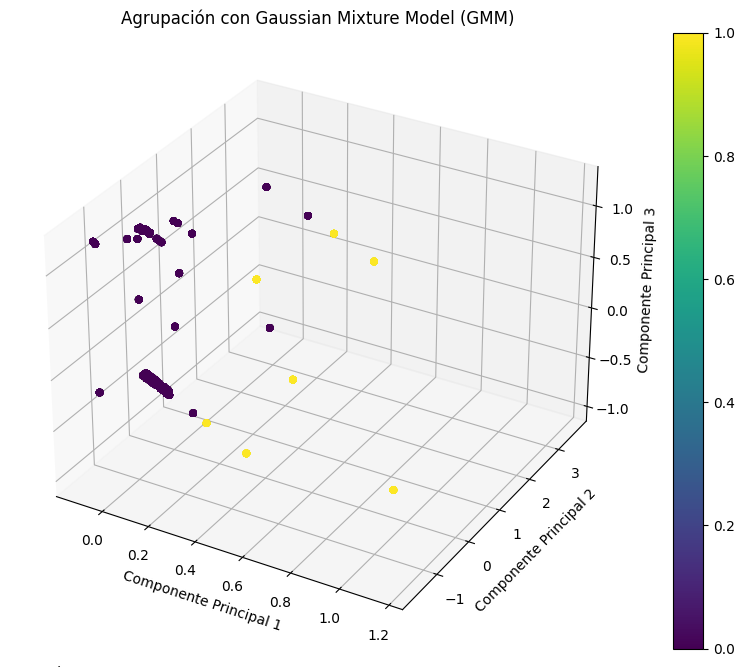

In [139]:
# Reducir la dimensionalidad a 2 componentes usando PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(SECOP_final_imputed)

# Crear un DataFrame con todos los componentes y las etiquetas de los clústeres
pca_df_all_components = pd.DataFrame(pca_result, columns=['Componente_1', 'Componente_2','Componente_3',])
pca_df_all_components['Cluster'] = gmm_labels

# Graficar los datos coloreados por los clústeres
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df_all_components['Componente_1'], pca_df_all_components['Componente_2'], pca_df_all_components['Componente_3'], c=pca_df_all_components['Cluster'], cmap='viridis')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Agrupación con Gaussian Mixture Model (GMM)')
plt.colorbar(scatter)
plt.show()


# **ARBOL DE DECISIÓN**

***Visualizar el árbol de decisión***

In [140]:
!pip install matplotlib


Fitting 5 folds for each of 54 candidates, totalling 270 fits
    TIPO_PROCESO  VALOR_ESTIMADO  DESCRIPCION_CONTRATO  CODIGO_UNSPSC
56             1      10462000.0                    58             11
1              1      85800000.0                    77              9
57             1     550000000.0                    89             20
18             1     121000000.0                     4             12
13             1     135141014.0                    95             19
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisión en el conjunto de prueba: 1.0


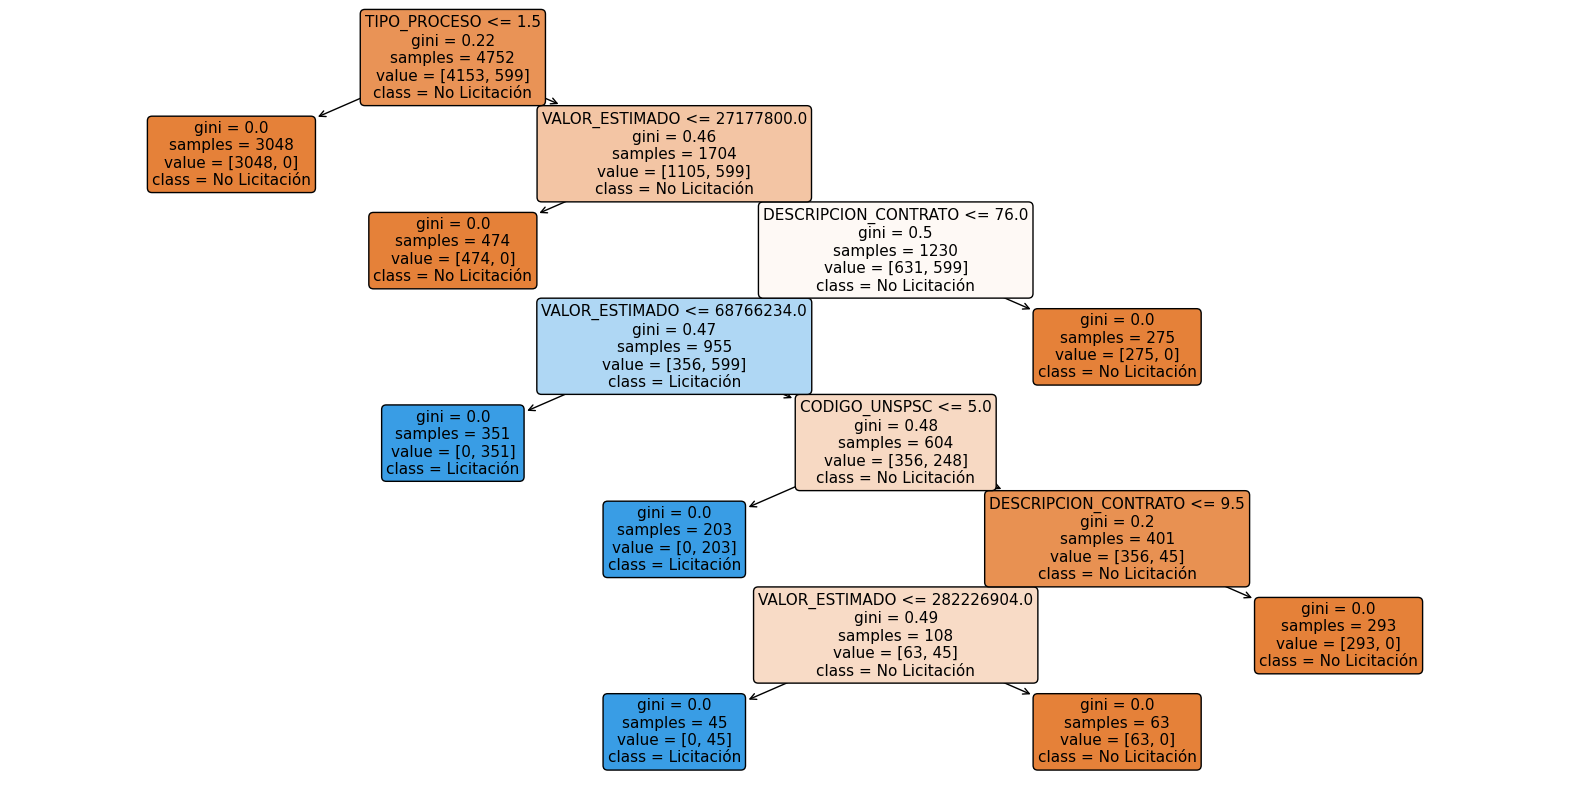

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Eliminar las comas de los valores en 'VALOR_ESTIMADO' y convertirlos a flotantes
df['VALOR_ESTIMADO'] = df['VALOR_ESTIMADO'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

# Manejar valores faltantes en 'VALOR_ESTIMADO'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['VALOR_ESTIMADO'] = imputer.fit_transform(df['VALOR_ESTIMADO'].values.reshape(-1, 1)).astype(float)

# Convertir campos categóricos usando LabelEncoder
label_encoders = {}
categorical_columns = ['TIPO_PROCESO', 'DESCRIPCION_CONTRATO', 'CODIGO_UNSPSC']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Dividir los datos en conjunto de entrenamiento y prueba
X = df[['TIPO_PROCESO', 'VALOR_ESTIMADO', 'DESCRIPCION_CONTRATO', 'CODIGO_UNSPSC']]
y = df['Licita']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar los hiperparámetros del modelo de árbol de decisión
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # profundidad máxima del árbol
    'min_samples_split': [2, 5, 10], # número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # número mínimo de muestras requeridas para estar en un nodo hoja
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por GridSearchCV
best_tree_classifier = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
best_score = best_tree_classifier.score(X_test, y_test)

# Verificación de las primeras filas de X para asegurar la correcta transformación
print(X.head())
# Mostrar las primeras filas del DataFrame actualizado
#print(df.head())

print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Precisión en el conjunto de prueba: {best_score}")

# Configurar tamaño de figura para visualización del árbol
plt.figure(figsize=(20, 10))  # Ajusta el tamaño según sea necesario para tu pantalla

# Dibujar el árbol
plot_tree(best_tree_classifier,
          filled=True,
          feature_names=X.columns,
          class_names=['No Licitación', 'Licitación'],
          rounded=True,
          proportion=False,
          precision=2)

# Mostrar el árbol
plt.show()


In [142]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np


# Eliminar las comas de los valores en 'VALOR_ESTIMADO' y convertirlos a flotantes
df['VALOR_ESTIMADO'] = df['VALOR_ESTIMADO'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

# Manejar valores faltantes en 'VALOR_ESTIMADO'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['VALOR_ESTIMADO'] = imputer.fit_transform(df['VALOR_ESTIMADO'].values.reshape(-1, 1)).astype(float)

# Convertir campos categóricos usando LabelEncoder
label_encoders = {}
categorical_columns = ['TIPO_PROCESO', 'DESCRIPCION_CONTRATO', 'CODIGO_UNSPSC']
for column in categorical_columns:
    df[column] = df[column].astype(str)
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Verificar cuántos valores faltantes hay en 'Licita'
print(f"Valores faltantes en 'Licita' antes de la eliminación: {df['Licita'].isna().sum()}")

# Dividir los datos en conjunto de entrenamiento y prueba, ignorando filas con NaN en 'Licita'
df_train = df.dropna(subset=['Licita'])
df_predict = df[df['Licita'].isna()]

# Verificar si df_train está vacío
if df_train.empty:
    raise ValueError("No hay datos suficientes para entrenar el modelo después de eliminar los valores faltantes en 'Licita'.")

X_train = df_train[['TIPO_PROCESO', 'VALOR_ESTIMADO', 'DESCRIPCION_CONTRATO', 'CODIGO_UNSPSC']]
y_train = df_train['Licita']

# Entrenar el modelo de árbol de decisión
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Predecir los valores de 'Licita' para las filas con valores faltantes
if not df_predict.empty:
    X_predict = df_predict[['TIPO_PROCESO', 'VALOR_ESTIMADO', 'DESCRIPCION_CONTRATO', 'CODIGO_UNSPSC']]
    df_predict['Licita'] = tree_classifier.predict(X_predict)

    # Combinar los resultados de nuevo en el DataFrame original
    df_combined = pd.concat([df_train, df_predict])
else:
    df_combined = df_train.copy()

# Cargar nuevos datos en el DataFrame df_nuevos desde la URL proporcionada  #datos_presentacion.csv  #prueba.csv
url = "https://raw.githubusercontent.com/aleja-k/PandasSecop/master/datos_presentacion.csv"
df_nuevos = pd.read_csv(url, encoding="utf-8", sep=';')

# Preprocesar los nuevos datos de la misma manera
df_nuevos['VALOR_ESTIMADO'] = df_nuevos['VALOR_ESTIMADO'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)
df_nuevos['VALOR_ESTIMADO'] = imputer.transform(df_nuevos['VALOR_ESTIMADO'].values.reshape(-1, 1)).astype(float)

for column in categorical_columns:
    le = label_encoders[column]
    df_nuevos[column] = df_nuevos[column].astype(str)  # Asegurar que todos los valores son cadenas
    # Usar pd.Categorical para manejar valores desconocidos
    df_nuevos[column] = pd.Categorical(df_nuevos[column], categories=le.classes_)
    # Luego transformar usando LabelEncoder
    df_nuevos[column] = df_nuevos[column].cat.codes

# Ajustar los hiperparámetros del modelo de árbol de decisión
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Hacer predicciones en los nuevos datos
X_nuevos = df_nuevos[['TIPO_PROCESO', 'VALOR_ESTIMADO', 'DESCRIPCION_CONTRATO', 'CODIGO_UNSPSC']]
df_nuevos['Licita'] = tree_classifier.predict(X_nuevos)

# Mostrar las primeras filas del DataFrame de nuevos datos con las predicciones
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
print(df_nuevos.head(10).to_string(index=False))




Valores faltantes en 'Licita' antes de la eliminación: 0
 Id                                                                                                                                                                                              DESCRIPCION                                                                     NUMERO_PROCESO                                ESTADO  TIPO_PROCESO                           UNIDAD_CONTRATACION  VALOR_ESTIMADO                   FASE_ACTUAL                                                                  ENTIDAD_ESTATAL                                                                      FECHA_PUBLICACION  FECHA_OFERTAS   CODIGO_NOTICE                                                                    FECHA_PRESENTACION           TIPO_CONTRATO                                                       JUSTIFICACION_CONTRATO                                                            FECHA_TERMINACION  DESCRIPCION_CONTRATO  VALOR_ESTIMADO_ADQUISICIO

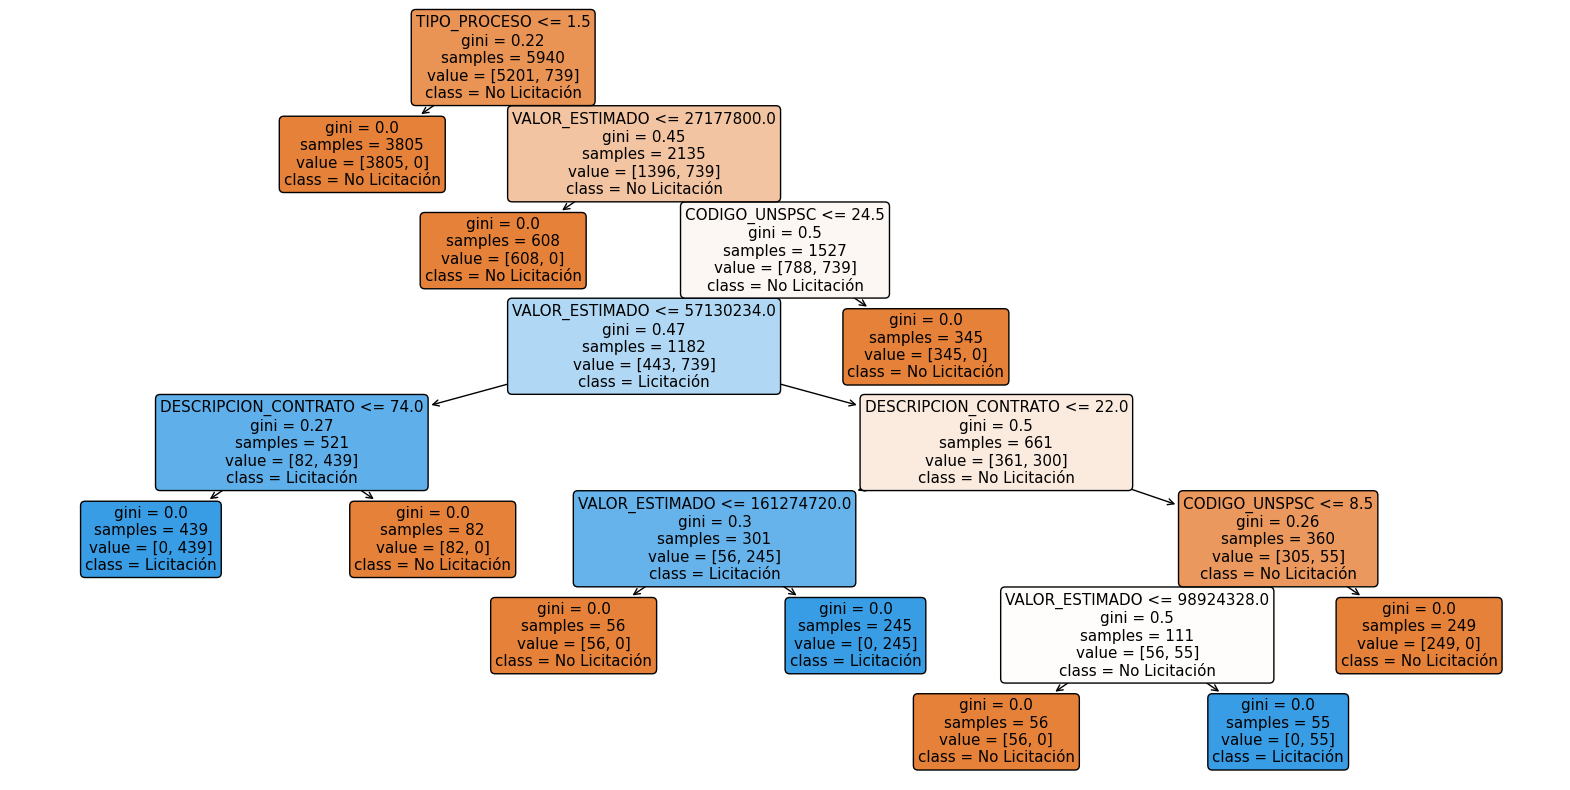

In [143]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Configurar tamaño de figura para visualización del árbol
plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=['No Licitación', 'Licitación'], rounded=True, proportion=False, precision=2)
plt.show()